# Bivariate Functions

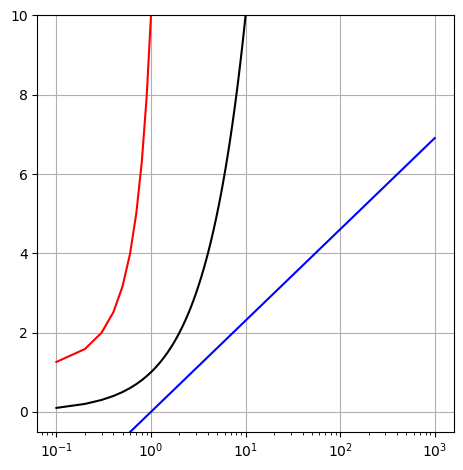

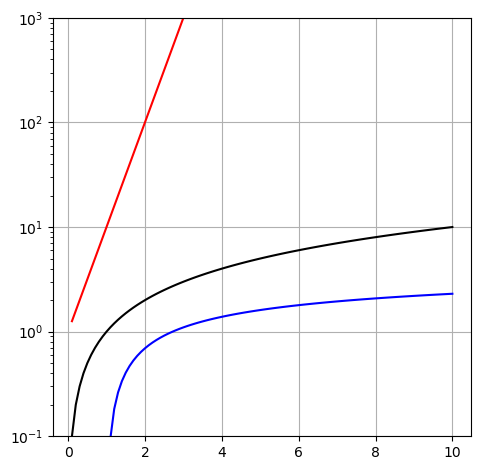

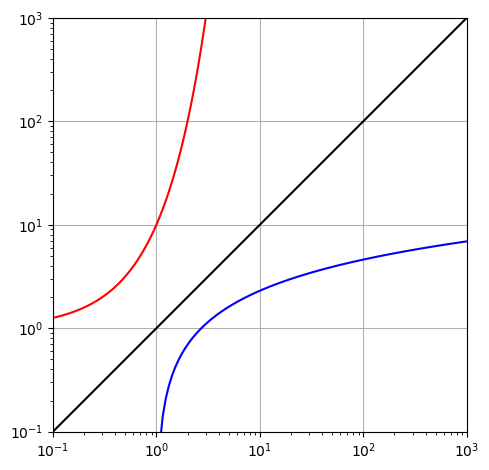

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.1, 10, 100)
x = np.linspace(0.1, 1000, 100)

#%% x log scale
f1 = 10**x1
f2 = x1
f3 = np.log(x)

fig, ax = plt.subplots()
plt.plot(x1,f1,color = 'r')
plt.plot(x1,f2,color = 'k')
plt.plot(x,f3,color = 'b')

plt.xscale("log")
plt.ylim((-0.5,10))
plt.grid()
plt.tight_layout()
ax.set_box_aspect(1)

#%% y log scale
f1 = 10**x1
f2 = x1
f3 = np.log(x1)

fig, ax = plt.subplots()
plt.plot(x1,f1,color = 'r')
plt.plot(x1,f2,color = 'k')
plt.plot(x1,f3,color = 'b')

plt.yscale("log")
plt.ylim((0.1,1000))
plt.grid()
plt.tight_layout()
ax.set_box_aspect(1)


#%% x and y log scale
x_log_1 = np.logspace(np.log10(0.1), np.log10(3), num=100,
                      endpoint=True, base=10.0)

x_log_2 = np.logspace(np.log10(0.1), np.log10(1000), num=100,
                      endpoint=True, base=10.0)

x_log_3 = np.logspace(np.log10(1), np.log10(1000), num=100,
                      endpoint=True, base=10.0)

f1 = 10**x_log_1
f2 = x_log_2
f3 = np.log(x_log_3)

fig, ax = plt.subplots()
plt.plot(x_log_1,f1,color = 'r')
plt.plot(x_log_2,f2,color = 'k')
plt.plot(x_log_3,f3,color = 'b')

plt.yscale("log")
plt.xscale("log")
plt.ylim((0.1,1000))
plt.xlim((0.1,1000))
plt.grid()
plt.tight_layout()
ax.set_box_aspect(1)

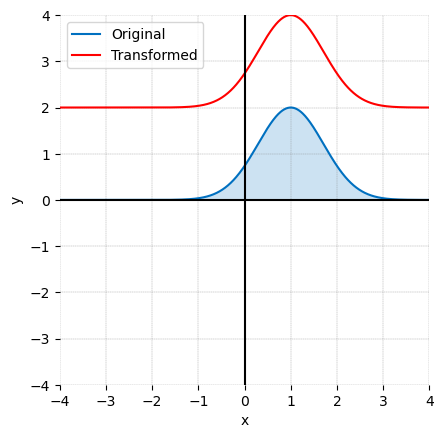

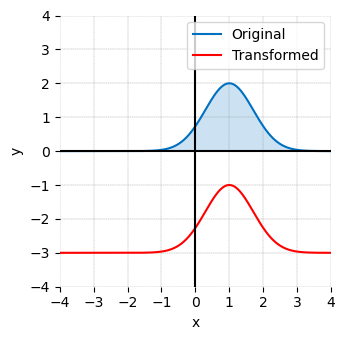

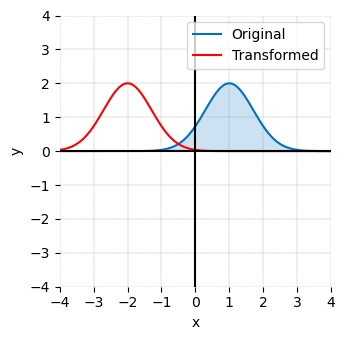

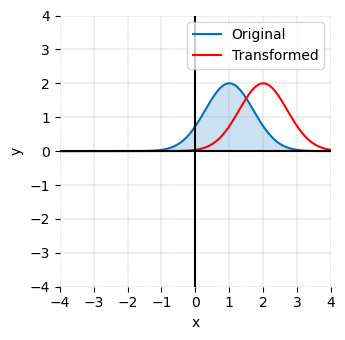

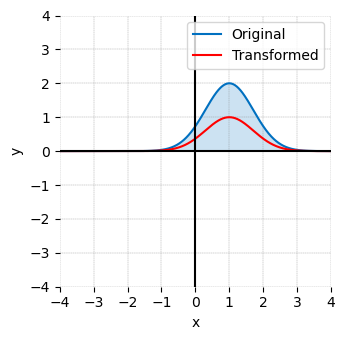

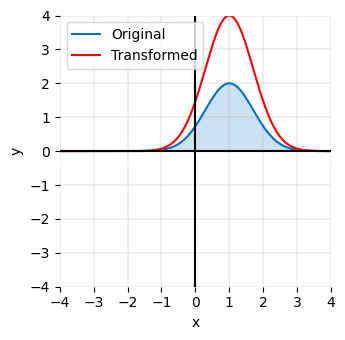

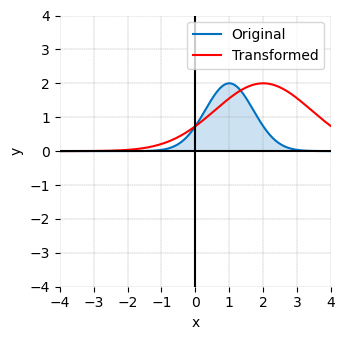

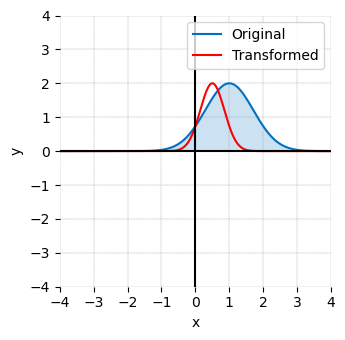

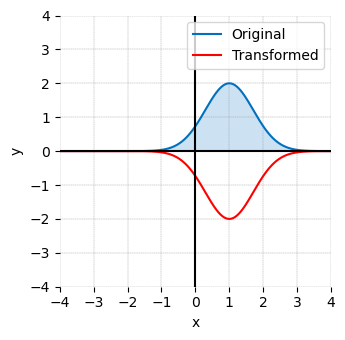

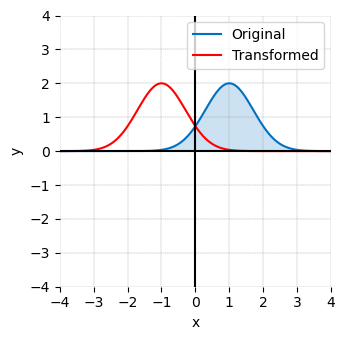

In [2]:
import matplotlib.pyplot as plt

def plot_curve(x_array, y_array, 
               x_array_new, y_array_new):

    fig, ax = plt.subplots()
    
    plt.plot(x_array, y_array, color = '#0070C0',
             label = 'Original')
    
    ax.fill_between(x_array,
                    y_array, 
                    edgecolor = 'none', 
                    facecolor = '#0070C0',
                    alpha = 0.2)

    plt.plot(x_array_new, y_array_new, color = 'r',
             label = 'Transformed')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.axvline(x=0, color='k', linestyle='-')
    plt.xticks(np.arange(-4, 4+1, step=1))
    plt.yticks(np.arange(-4, 4+1, step=1))
    plt.axis('scaled')
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.legend()
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

import numpy as np
from sympy.abc import x
from sympy import exp, lambdify

x_array = np.arange(-4,4+0.01, step = 0.01)
f_x = 2*exp(- (x-1)**2);

f_x_fcn = lambdify([x],f_x)

f_x_array = f_x_fcn(x_array) # original function

#%% vertical shift

for c in [2,-3]:
    
    f_x_array_new = f_x_array + c
    
    plot_curve(x_array, f_x_array, 
               x_array, f_x_array_new)


#%% horizontal shift

for c in [3,-1]:

    f_x_new = 2*exp(- ((x+c)-1)**2);
    f_x_new_fcn = lambdify([x],f_x_new)
    
    f_x_array_new = f_x_new_fcn(x_array)
    
    plot_curve(x_array, f_x_array, 
               x_array, f_x_array_new)

#%% vertical scaling

for c in [1/2,2]:
    
    f_x_array_new = c*f_x_array
    
    plot_curve(x_array, f_x_array, 
               x_array, f_x_array_new)

#%% horizontal scaling 

for c in [1/2,2]:

    f_x_new = 2*exp(- (c*x-1)**2);
    f_x_new_fcn = lambdify([x],f_x_new)
    
    f_x_array_new = f_x_new_fcn(x_array)
    
    plot_curve(x_array, f_x_array, 
               x_array, f_x_array_new)
    
#%% reflection about x-axis

f_x_array_new = -f_x_array

plot_curve(x_array, f_x_array, 
           x_array, f_x_array_new)

#%% reflection about y-axis

f_x_new = 2*exp(- (-x-1)**2);
f_x_new_fcn = lambdify([x],f_x_new)

f_x_array_new = f_x_new_fcn(x_array)

plot_curve(x_array, f_x_array, 
           x_array, f_x_array_new)

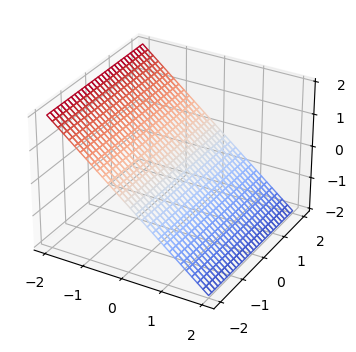

<Figure size 750x350 with 0 Axes>

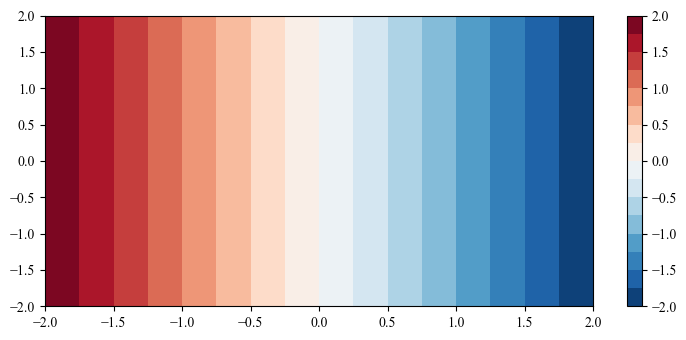

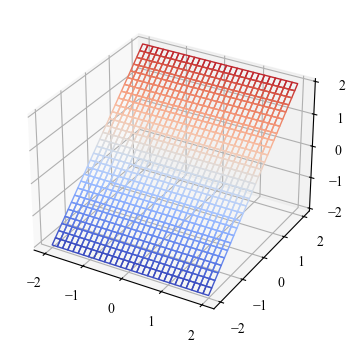

<Figure size 750x350 with 0 Axes>

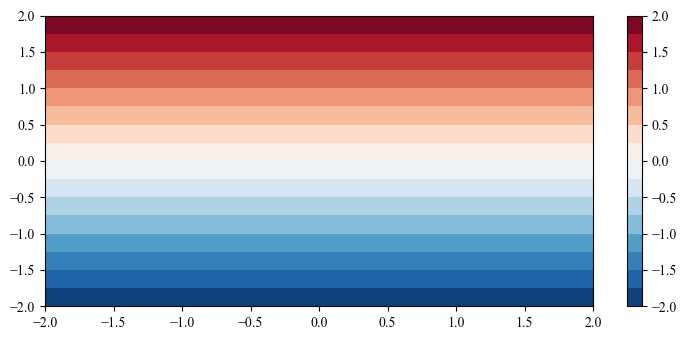

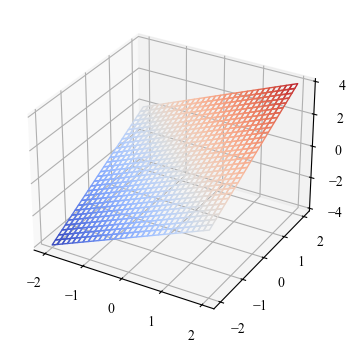

<Figure size 750x350 with 0 Axes>

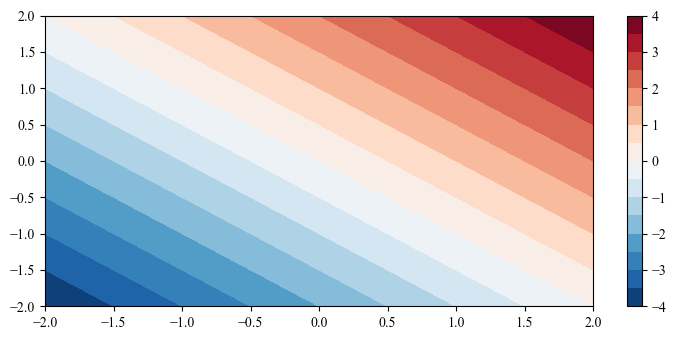

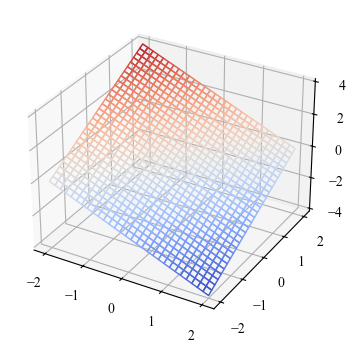

<Figure size 750x350 with 0 Axes>

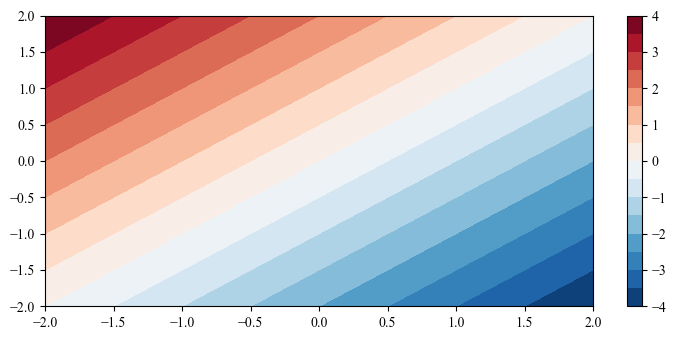

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def mesh_square(x1_0,x2_0,r,num):
    
    # generate mesh
 
    rr = np.linspace(-r,r,num)
    xx1,xx2 = np.meshgrid(rr,rr);
 
    xx1 = xx1 + x1_0; 
    xx2 = xx2 + x2_0;
    
    return xx1, xx2

def plot_surf(xx1,xx2,ff,caption):

    norm_plt = plt.Normalize(ff.min(), ff.max())
    colors = cm.coolwarm(norm_plt(ff))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(xx1,xx2,ff,
    facecolors=colors, shade=False)
    surf.set_facecolor((0,0,0,0))
    # z_lim = [ff.min(),ff.max()]
    # ax.plot3D([0,0],[0,0],z_lim,'k')
    plt.show()

    plt.tight_layout()
    ax.set_xlabel('$\it{x_1}$')
    ax.set_ylabel('$\it{x_2}$')
    ax.set_zlabel('$\it{f}$($\it{x_1}$,$\it{x_2}$)')
    ax.set_title(caption)


    ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
    ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = "10"

def plot_contourf(xx1,xx2,ff,caption):
    
    fig, ax = plt.subplots()

    cntr2 = ax.contourf(xx1,xx2,ff, levels = 15, cmap="RdBu_r")

    fig.colorbar(cntr2, ax=ax)
    plt.show()

    ax.set_xlabel('$\it{x_1}$')
    ax.set_ylabel('$\it{x_2}$')

    ax.set_title(caption)
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    
#%% initialization

x1_0  = 0;  # center of the mesh
x2_0  = 0;  # center of the mesh
r     = 2;  # radius of the mesh
num   = 30; # number of mesh grids
xx1,xx2 = mesh_square(x1_0,x2_0,r,num); # generate mesh

#%% Visualizations

plt.close('all')

# f(x1,x2) = -x1

ff = -xx1;
caption = '$\it{f} = -\it{x_1}$';
plot_surf (xx1,xx2,ff,caption)
plot_contourf (xx1,xx2,ff,caption)


#%% f(x1,x2) = x2

ff = xx2;
caption = '$\it{f} = \it{x_2}$';
plot_surf (xx1,xx2,ff,caption)
plot_contourf (xx1,xx2,ff,caption)

#%% f(x1,x2) = x1 + x2

ff = xx1 + xx2;
caption = '$\it{f} = \it{x_1} + \it{x_2}$';
plot_surf (xx1,xx2,ff,caption)
plot_contourf (xx1,xx2,ff,caption)

#%% f(x1,x2) = -x1 + x2

ff = -xx1 + xx2;
caption = '$\it{f} = -\it{x_1} + \it{x_2}$';
plot_surf (xx1,xx2,ff,caption)
plot_contourf (xx1,xx2,ff,caption)


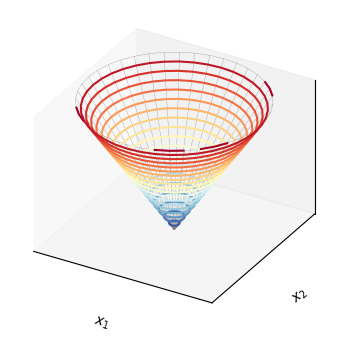

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def mesh_circ(c1, c2, r, num):
    
    theta = np.arange(0,2*np.pi+np.pi/num,np.pi/num)
    r     = np.arange(0,r,r/num)
    theta,r = np.meshgrid(theta,r)
    xx1 = np.cos(theta)*r + c1
    xx2 = np.sin(theta)*r + c2
    
    return xx1, xx2

xx1, xx2 = mesh_circ(0, 0, 4, 20)

ff_x = np.sqrt(xx1**2 + xx2**2)

# 3D visualization
ax = plt.figure().add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color = [0.5,0.5,0.5],
                  linewidth = 0.2)

ax.contour3D(xx1, xx2, ff_x, 20, cmap = 'RdYlBu_r')

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())
ax.set_proj_type('ortho')
# ax.view_init(30, -125)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')
plt.tight_layout()